# Behavioural Patterns

- How do individual objects collaborate to achieve a common goal?

- Each object is a piece of a larger solution, so for each to work effectively, it needs a set purpose
    - Like individuals in a company

## Template Method Pattern

- Example:
    - Suppose you are a head chef at a restaurant chain. 
    - You want the dishes across all outlets to be consistent, so you need to provide instructions for making every dish. 
    - Some steps are common (boil water, boil pasta, pour sauce, garnish plates)
    - Some steps are different (different steps for making different sauces, different ingredients)

- In the example above, a good way to arrange the logical steps to create different dishes is using **template method**
    - Template method defines an algorithm's step generally, deferring the implementation of some steps to subclasses
    - Principle here is **generalisation**
    - Useful when you have 2 classes with very similar functionality!

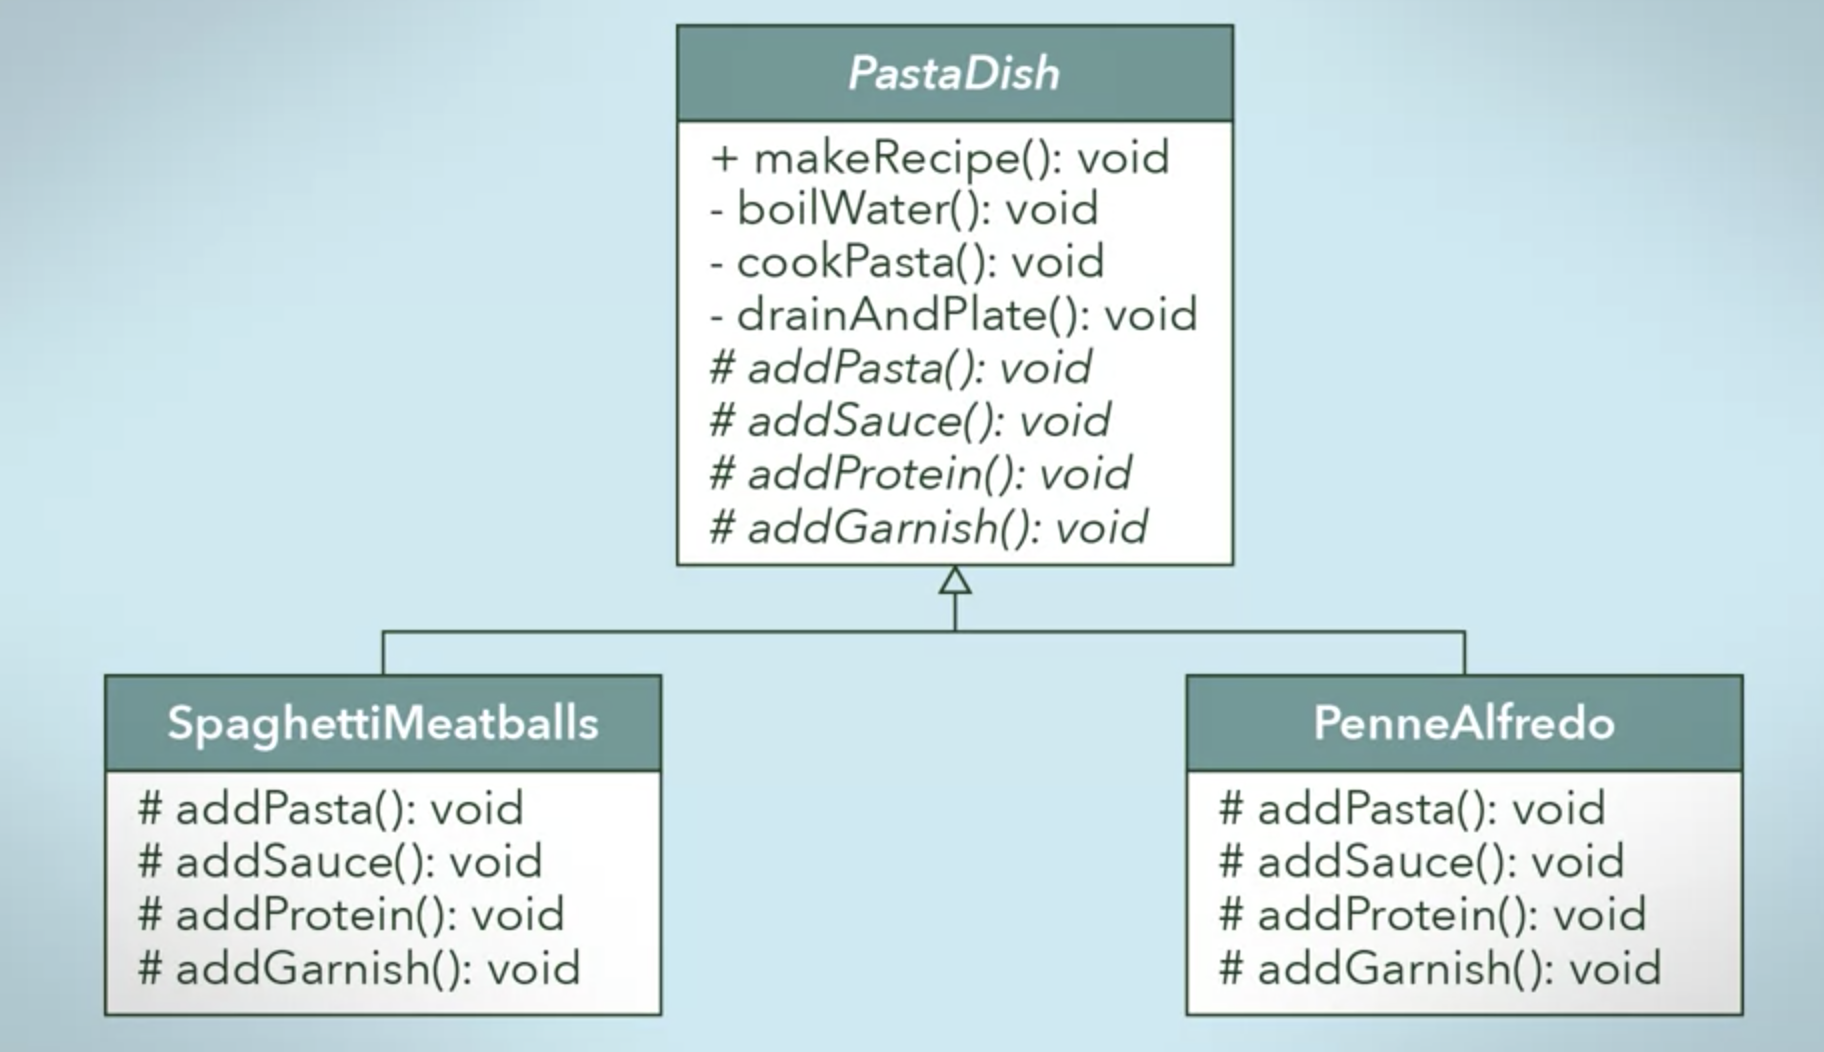

In [ ]:
from abc import ABCMeta, abstractmethod
from typing import final

class PastaDish(metaclass=ABCMeta):
    
    @final
    def makePasta(self):
        self.boilWater()
        self.addPasta()
        self.cookPasta()
        self.drainAndPlate()
        self.addSauce()
        self.addProtein()
        self.addGarnish()
    
    @abstractmethod
    def addPasta(self):
        ...
    
    @abstractmethod
    def addSauce(self):
        ...

    @abstractmethod
    def addProtein(self):
        ...

    @abstractmethod
    def addGarnish(self):
        ...

    def boilWater(self):
        print("Boiling water...")

    def cookPasta(self):
        print("Cooking pasta...")

    def drainAndPlate(self):
        print("Draining and plating pasta...")

class SpaghettiMeatballs(PastaDish):
    def addPasta(self):
        print("Adding spaghetti...")

    def addProtein(self):
        print("Adding meatballs...")

    def addSauce(self):
        print("Adding tomato sauce...")

    def addGarnish(self):
        print("Adding parmesan cheese...")

class PenneAlfredo(PastaDish):
    def addPasta(self):
        print("Adding penne...")

    def addProtein(self):
        print("Adding chicken...")

    def addSauce(self):
        print("Adding Alfredo sauce...")

    def addGarnish(self):
        print("Adding parsley...")

## Chain of Responsibility Pattern

- Chain of object that are responsible for handling requests
- Example:
    - Getting help from healthcare system
    - Go to polyclinic --> get referred to specialist --> Get triaged by nurses etc..
    - You don't care how and who solves your problem, only that it gets solved
    - Request --> handler --> handler --> handler....

- Example 2:
    - Say you are fixing a chair, and you need a tool to tighten a specific screw
    - You take each screwdriver and try until 1 works

- This can be used in many situations
    - In an email service, you can create filters until your inbox successfully filters what you consider spam

- You can often combine this with the **template** pattern, because each "handler" is very similar to the others in the methods they implement

- This will also help avoid coupling sender to receiver!

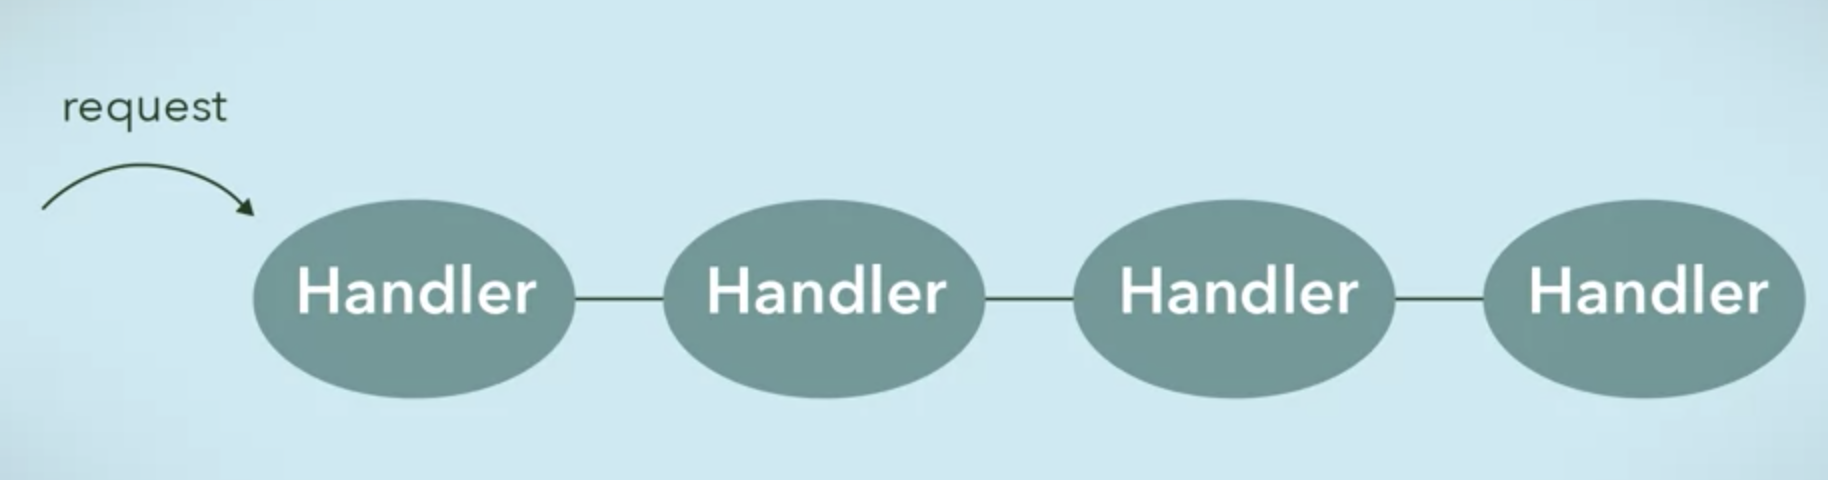

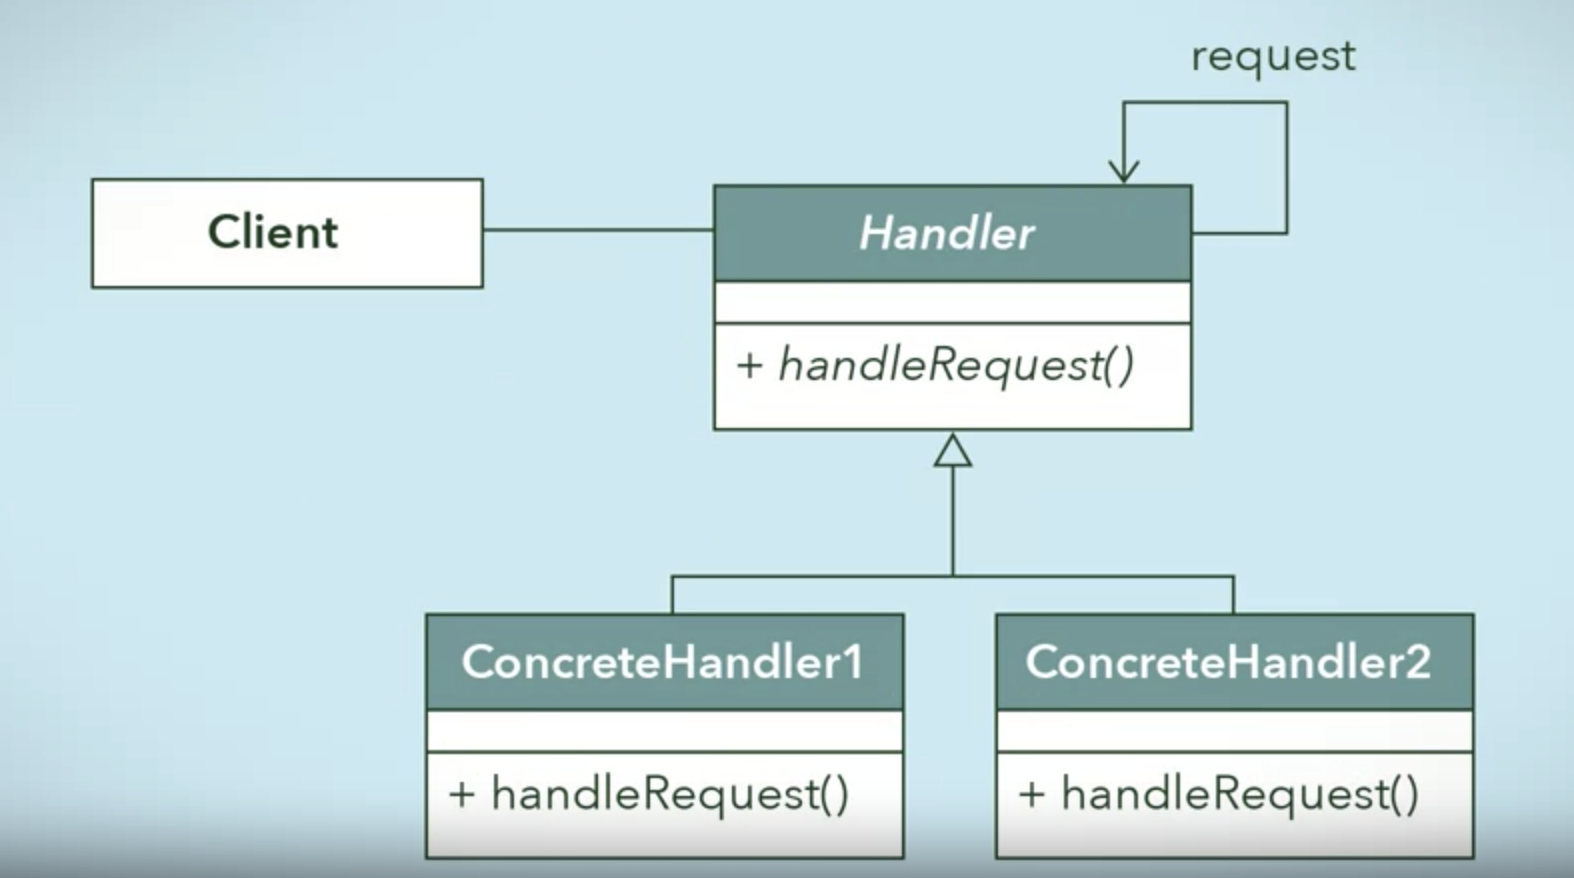

## State Pattern

- Where objects in your code change behaviour based on current state
- Used when you need to change behaviour of the object based on state it is in at run-time

- Example:
    - Vending machine has several states and specific behaviour based on those states
    - Let's suppose I want to buy a chocolate bar
    - Possible sequences:
        - insert money --> make selection --> dispense bar --> end
        - insert money --> REGRET --> refund --> end
    - Possible states:
        - Idle
        - Has 1 dollar
        - Out of stock
    - Possible triggers/events
        - Insert $1
        - Eject money
        - Dispense

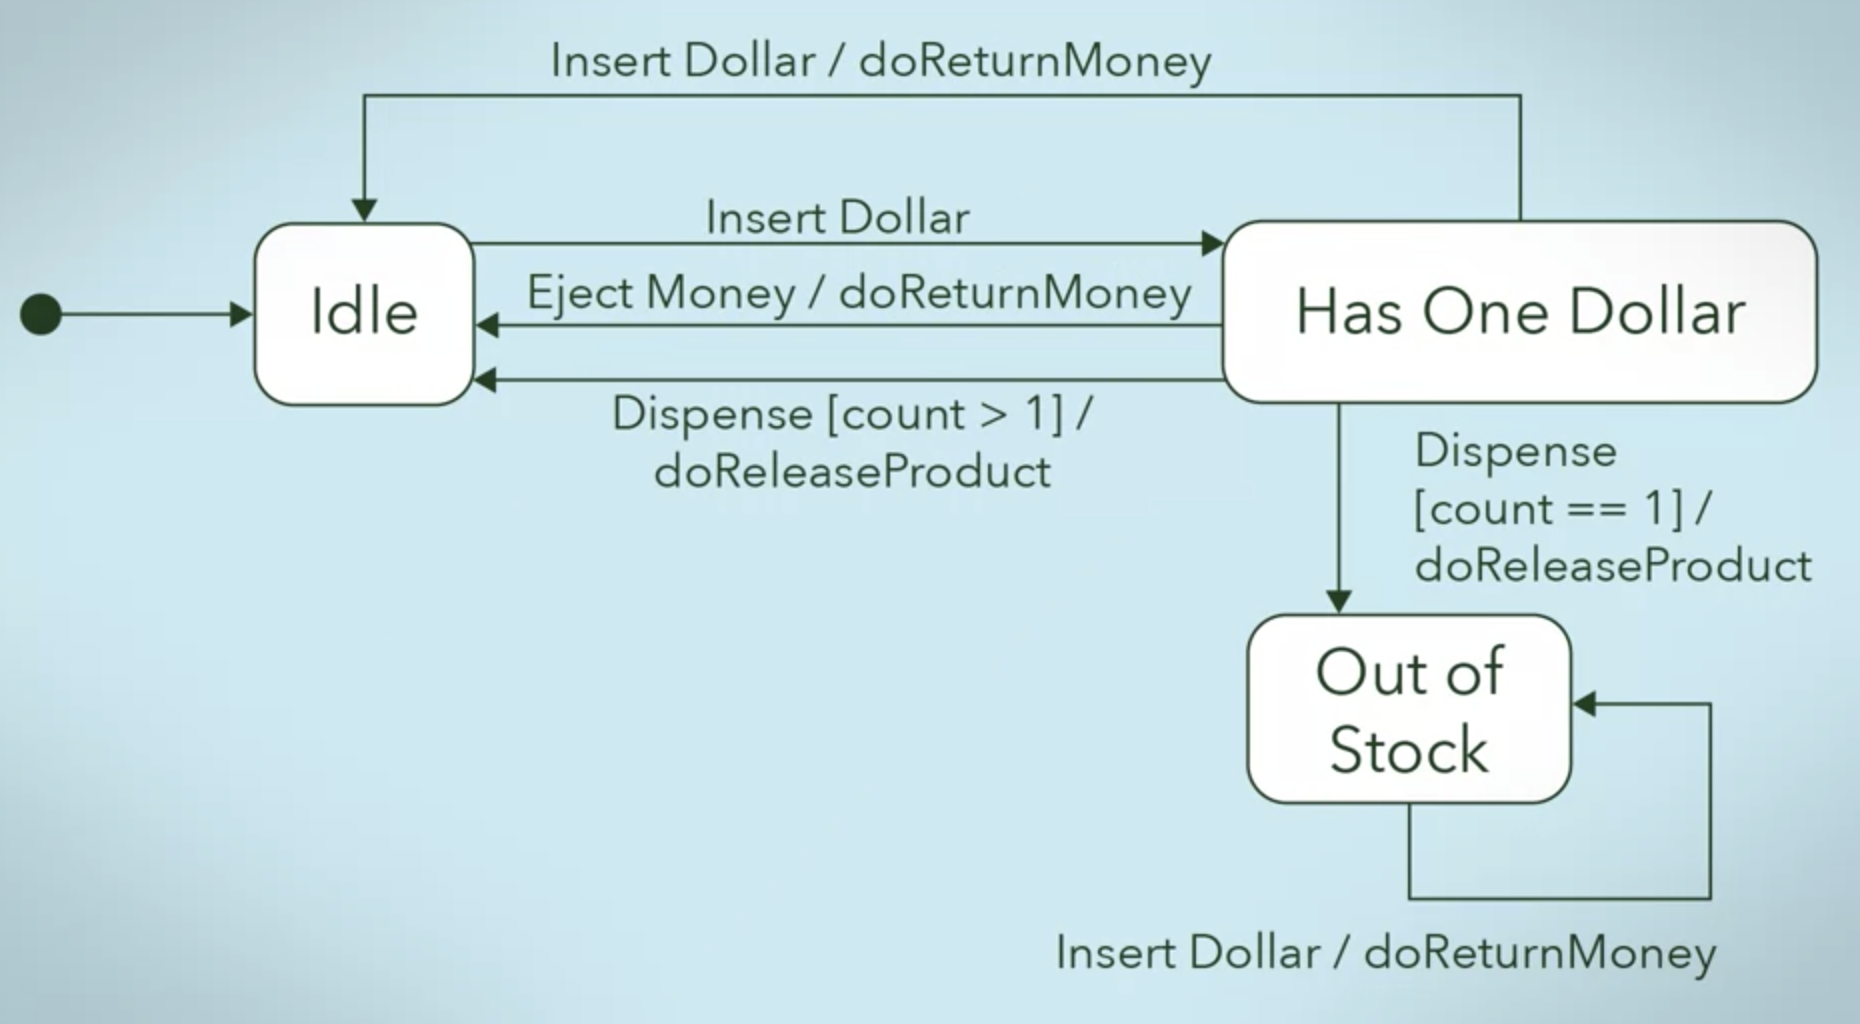

In [ ]:
# Make singleton state objects
from abc import ABC, abstractmethod

class State(ABC):
    def __init__(self):
        self.

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod

class Context:
    """
    The Context defines the interface of interest to clients. It also maintains
    a reference to an instance of a State subclass, which represents the current
    state of the Context.
    """

    _state = None
    """
    A reference to the current state of the Context.
    """

    def __init__(self, state: State) -> None:
        self.transition_to(state)

    def transition_to(self, state: State):
        """
        The Context allows changing the State object at runtime.
        """

        print(f"Context: Transition to {type(state).__name__}")
        self._state = state
        self._state.context = self

    """
    The Context delegates part of its behavior to the current State object.
    """

    def request1(self):
        self._state.handle1()

    def request2(self):
        self._state.handle2()

class State(ABC):
    """
    The base State class declares methods that all Concrete State should
    implement and also provides a backreference to the Context object,
    associated with the State. This backreference can be used by States to
    transition the Context to another State.
    """

    @property
    def context(self) -> Context:
        return self._context

    @context.setter
    def context(self, context: Context) -> None:
        self._context = context

    @abstractmethod
    def handle1(self) -> None:
        pass

    @abstractmethod
    def handle2(self) -> None:
        pass

"""
Concrete States implement various behaviors, associated with a state of the
Context.
"""

class ConcreteStateA(State):
    def handle1(self) -> None:
        print("ConcreteStateA handles request1.")
        print("ConcreteStateA wants to change the state of the context.")
        self.context.transition_to(ConcreteStateB())

    def handle2(self) -> None:
        print("ConcreteStateA handles request2.")

class ConcreteStateB(State):
    def handle1(self) -> None:
        print("ConcreteStateB handles request1.")

    def handle2(self) -> None:
        print("ConcreteStateB handles request2.")
        print("ConcreteStateB wants to change the state of the context.")
        self.context.transition_to(ConcreteStateA())

context = Context(ConcreteStateA())
context.request1()
context.request2()

Context: Transition to ConcreteStateA
ConcreteStateA handles request1.
ConcreteStateA wants to change the state of the context.
Context: Transition to ConcreteStateB
ConcreteStateB handles request2.
ConcreteStateB wants to change the state of the context.
Context: Transition to ConcreteStateA


## Command Pattern

## Mediator Pattern

## Observer Pattern